<a href="https://colab.research.google.com/github/RamanGupta16/ML/blob/master/EVA_Ph1/Session4/Session4_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Session4 1st DNN ==> Simple Plain Vanilla model
# 3x3, 1x1, MaxPool, 
# default LR
# 10 epochs
# 32 batch size

# RESULTS SUMMARY
# Parameters: 20,922
# 99.07 best validation accuracy in epoch 5

In [4]:
# Comments:
# Install keras onto colab VM 
# Import numpy package
# Import keras models, layers, convolution, dropout
# Import MNIST dataset
#

# https://keras.io/
!pip install -q keras

import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


(60000, 28, 28)


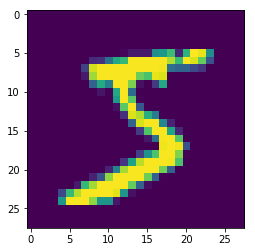

In [5]:
# Comments:
# 1. Load MNIST dataset. It loads both Training and Test datasets
# 2. Training set has 60,000 image samples. X_train are images and y_train is label of images
# 3. Test set of 10,000 image samples. y_test are images and y_train is label of images
# 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Comments:
# 1. Training set has 60,000 image samples of size 28x28 pixels
# 2. Show '5' hand written digit image
#
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Comments:
# 1. Reshape the 60,000 training data with channel dimenison as 1. So each image is 28x28x1 dimension
# 2. Reshape the 10,000 test data with channel dimenison as 1. So each image is 28x28x1 dimension
#

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Comments:
# 1. Divide training data by 255 so that pixels become float values betwee 0..1
# 2. Divide test data by 255 so that pixels become float values betwee 0..1
#

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# Comments:
# 1. Print the first 10 labels of training data
#
y_train[:10]

# Comments:
# 1. Convert 1-dimensional train and test labels into one-hot vector of floats
#    where only 1 value in vector is high(hot) indicating the label of image.
#    Eaxmple [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] ==> 5

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Comments:
# 1. Print the first 10 training label as one-hot vectors.
#    Eaxmple [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] ==> 5

Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
# Comments:
# 1. Create the model
# 2. Add convolution Layers

# Session4 1st DNN ==> Simple Plain Vanilla model
# 3x3, 1x1, MaxPool, default LR, 10 epochs, 32 batch size

from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26x26x16, 3x3
model.add(Convolution2D(16, 3, 3, activation='relu')) #  24x24x32, 5x5
model.add(Convolution2D(32, 3, 3, activation='relu')) #  22x22x128, 7x7


model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11x128, 14x14
model.add(Convolution2D(8, 1, 1, activation='relu')) # 11x11x32, 14x14


model.add(Convolution2D(16, 3, 3, activation='relu')) # 9x9x64, 16x16
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7x7x128, 18x18

model.add(Convolution2D(8, 1, 1, activation='relu')) # 7x7x32, 18x18

model.add(Convolution2D(16, 3, 3, activation='relu')) # 5x5, 20x20
model.add(Convolution2D(32, 3, 3, activation='relu')) # 3x3, 22x22

model.add(Convolution2D(10, 3, 3)) # 1x1x10, 24x24

model.add(Flatten())
model.add(Activation('softmax'))

# Summarize the model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarnin

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 8)         264       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          4640      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`


In [0]:
# Comment
# 1. Compile the model and define loss function, optimization and metrics to measure the prediction

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
# Comments:
# 1. Train the model for 10 epochs with 32 batch size

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  672/60000 [..............................] - ETA: 14s - loss: 0.0170 - acc: 0.9926

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


60000/60000 [==============================] - 12s 207us/step - loss: 0.0249 - acc: 0.9920 - val_loss: 0.0316 - val_acc: 0.9905
Epoch 2/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0232 - acc: 0.9927 - val_loss: 0.0344 - val_acc: 0.9890
Epoch 3/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0349 - val_acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0196 - acc: 0.9933 - val_loss: 0.0467 - val_acc: 0.9859
Epoch 5/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0183 - acc: 0.9945 - val_loss: 0.0343 - val_acc: 0.9907
Epoch 6/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0171 - acc: 0.9946 - val_loss: 0.0514 - val_acc: 0.9881
Epoch 7/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0190 - acc: 0.9940 - val_loss: 0.0374 - val_acc: 0.9881
Epoch 8/10
60000/60000 [==============

In [12]:
# Comments:
# 1. Evaluate the trained model on test dataset
# 2. Print evaluated validation accuracy score.

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03820739018618697, 0.9907]


In [0]:
# Comments:
# 1. Generate the predictions for the test dataset.
# 2. These predictions are in 1-hot vector format
#

y_pred = model.predict(X_test)

In [14]:
# Comments:
# 1. Print the first 9 Predictions
# 2. Only prediction for digit 4 are correct rest are wrong.
# 3. Correct predictions for digit 4:
#    [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
#    [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
#

print(y_pred[:9])
print(y_test[:9])

[[4.69383443e-14 6.53801492e-12 2.47971865e-09 3.18241128e-10
  1.27236167e-16 5.65569943e-12 6.09472818e-27 1.00000000e+00
  4.70010112e-16 4.33117153e-10]
 [4.94789522e-11 2.06939134e-07 9.99999404e-01 1.23974962e-12
  1.02128581e-07 3.28603898e-12 2.65559521e-07 6.82102649e-13
  1.33775115e-08 9.99163044e-11]
 [1.32167699e-09 9.99975324e-01 3.10982706e-08 3.55164335e-11
  2.28618756e-05 1.51434165e-06 1.16681817e-10 1.43832736e-07
  7.96286059e-09 8.12645737e-08]
 [9.99998569e-01 1.92385011e-10 1.71223022e-07 2.22239631e-08
  8.73647942e-12 1.23125608e-06 1.71479488e-08 1.37262368e-10
  4.28415481e-09 7.85685028e-09]
 [8.18634711e-14 2.07567714e-13 6.49789846e-13 1.07187981e-13
  9.99989271e-01 5.96505734e-10 1.15902600e-11 1.73100336e-11
  2.43811395e-11 1.07395308e-05]
 [3.00370478e-10 9.99997973e-01 7.55189244e-09 2.05539882e-12
  1.61065100e-06 3.41568636e-07 1.65749619e-11 8.53987530e-08
  1.01598896e-09 2.90872726e-09]
 [6.05955216e-15 1.22355281e-09 9.10536750e-12 7.04110728e

In [15]:
# Comment
# Create Layer dictionary

layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7fe6d4b05240>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7fe6d4b05588>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7fe6d22ac278>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7fe6d1a6cdd8>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7fe6d22ac390>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7fe6d1a80048>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7fe6d1a187f0>, 'conv2d_7': <keras.layers.convolutional.Conv2D object at 0x7fe6d1a2d128>, 'conv2d_8': <keras.layers.convolutional.Conv2D object at 0x7fe6d1a40358>, 'conv2d_9': <keras.layers.convolutional.Conv2D object at 0x7fe6d19dc9b0>, 'conv2d_10': <keras.layers.convolutional.Conv2D object at 0x7fe6d1a043c8>, 'flatten_1': <keras.layers.core.Flatten object at 0x7fe6d19c6278>, 'activation_1': <keras.layers.core.Activation object at 0x7fe6d19c62b0>}


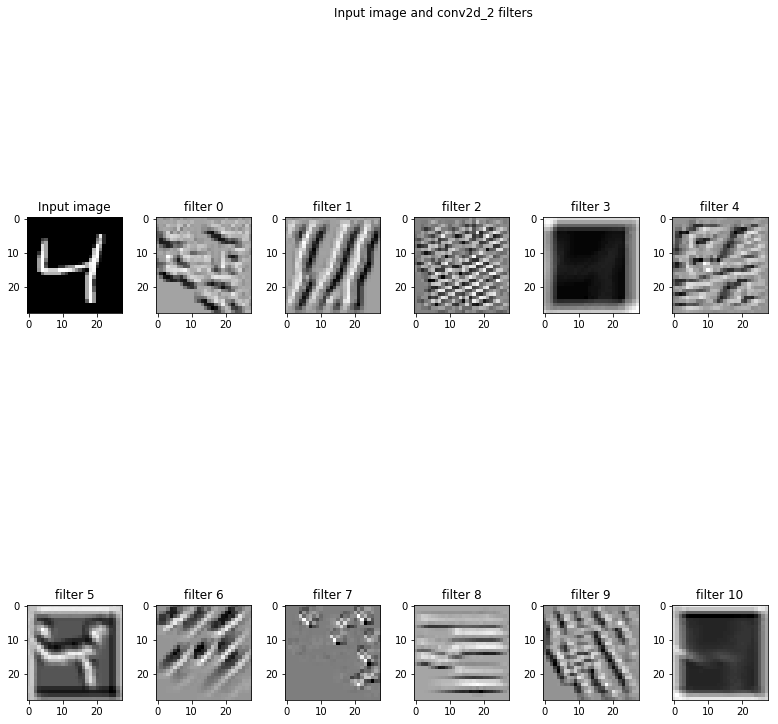

In [19]:
# Comment
# Visualize image in filter

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()